<font color=blue> Привет еще раз. Спасибо, что доделал работу. Мои комментарии на этот раз выделены синим цветом.
    
---

---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой *Комментарий от наставника*. Пострайся учесть эти комментарии.

---

---
## Комментарий от наставника


В работе желательно делать некое вступление, описание самого проекта. Также необходимо приводить краткий план того, что надо сделать(если этот план имеется). Название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

---

## Определение перспективного тарифа для телекомкомпании

Пользователям предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

План анализа:
 - загрузить таблицы
 - провести анализ этих таблиц (что за данные, какие типы данных, сколько столбцов и строк), определить проблемы с данными.
 - провести предобработку данных
 - поменять типы данных
 - согласно условиям оператора округляем время звонков и интернета за большего целого
 - добавить столбец с месяцем, когда производился звонок, отправлялась смс и был выход в интернет
 - формируем единую таблицу по месяцам и звонков, интернета и смс
 - пишем функцию, которая считаем прибыль по месяцам
 - формируем таблицы с тарифами
 - считаем дисперсию, стандартное отклонение, среднее по каждому показателю
 - строим графики зависимости двух тарифов по всем показателям
 - анализ графиков
 - строим гипотезу различия двух тарифов
 - строим гипотезу различия среднего в Москве и в других районах
 - итоговый вывод

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt # импортирую библиотеку matplotlib.pyplot
import seaborn as sns

In [2]:
data_calls=pd.read_csv('/datasets/calls.csv') # записываем дата фрэйм звонков в data_call из файла

In [3]:
data_calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Data_call-это дата с звонками всех пользователей. Состоит из 4 столбцов и 202607 строк. Пропущенных значений нет.

In [4]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
data_internet=pd.read_csv('/datasets/internet.csv') # записываем дата фрэйм использования интернета в data_internet из файла
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Data_internet-это дата с звонками всех пользователей. Состоит из 4 столбцов и 149396 строк. Пропущенных значений нет.

In [6]:
data_messages=pd.read_csv('/datasets/messages.csv') # записываем дата фрэйм использования сообщений в data_messages из файла
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Data_messages-это дата с использованными сообщениями всех пользователей. Состоит из 3 столбцов и 123036 строк. Пропущенных значений нет.

In [7]:
data_messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [8]:
data_tariffs=pd.read_csv('/datasets/tariffs.csv') # записываем дата фрэйм о тарифах в data_tariffs из файла
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Data_tariffs-это дата с информацией о тарифах. Состоит из 8 столбцов и 2 строк. Пропущенных значений нет.

In [9]:
data_users=pd.read_csv('/datasets/users.csv')# записываем дата фрэйм информацию о пользователях в data_users из файла
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Data_users-это дата с информацией о пользователях. Состоит из 8 столбцов и 500 строк. Пропущенные значения есть. У столбца churn_date есть 462 пропуска.Это столбец с датой прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). В полследствии можно заменить на 0

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

---
## Комментарий от наставника


Первый взгляд на данные выполнен. Стоит описать все проблемы в данных и то, как их исправить.

---

Есть проблемы в данных. Надо менять типы данных в датах. Вещественный тип в звонках, потреблении интернета и кл-ве смс переведем в целочисленный. Присутствуют пропуски в churn_date. Есть смысл их просто поменять на 0(значит смены оператора не было). В соответствии требования оператора округлить длительность звонка и потребление интернета до целого большего.

## Предобработка данных

Во всех столбцах где есть дата меняем тип на date_time

In [11]:
data_calls['call_date']=pd.to_datetime(data_calls['call_date'],format='%Y-%m-%d')

Значения потраченных минут переводим в целоцисленные

In [12]:
data_messages['message_date']=pd.to_datetime(data_messages['message_date'],format='%Y-%m-%d %H:%M:%S')

Значения потраченных mb переводим в целочисленные и вверх до целого большего

In [13]:
data_internet['mb_used']=round(data_internet['mb_used'].astype('int64')+0.45)# округляю количество мб до целого большего

In [14]:
data_internet['mb_used'].value_counts()

0.0       19699
332.0       231
381.0       229
252.0       222
376.0       222
          ...  
1498.0        1
1524.0        1
1454.0        1
1397.0        1
1441.0        1
Name: mb_used, Length: 1421, dtype: int64

---
## Комментарий от наставника

По условию задания округлять все значения надо вверх.

---

In [15]:
data_calls=data_calls.query('duration>0') #Избавился от 0. Возможно это недозвоны

In [16]:
data_calls['duration']=round(data_calls['duration']+0.45) # все значение меньше 1 округляем до большего целого

<font color=blue> Для округления вверх есть метод ceil().
    
---

In [17]:
data_calls['duration'].value_counts()

6.0     11561
7.0     11403
8.0     11361
5.0     11323
4.0     11070
9.0     10839
10.0    10308
3.0     10267
2.0      9353
11.0     9166
12.0     8555
1.0      8314
13.0     7346
14.0     6562
15.0     5385
16.0     4569
17.0     3593
18.0     3009
19.0     2345
20.0     1814
21.0     1264
22.0      976
23.0      704
24.0      464
0.0       427
25.0      357
26.0      246
27.0      146
28.0      105
29.0       52
30.0       40
31.0       31
32.0       16
33.0        9
35.0        4
34.0        4
36.0        2
37.0        2
38.0        2
Name: duration, dtype: int64

In [18]:
data_internet['session_date']=pd.to_datetime(data_internet['session_date'],format='%Y-%m-%d')

In [19]:
data_users['churn_date']=pd.to_datetime(data_users['churn_date'],format='%Y-%m-%d')

In [20]:
data_users['reg_date']=pd.to_datetime(data_users['reg_date'],format='%Y-%m-%d')

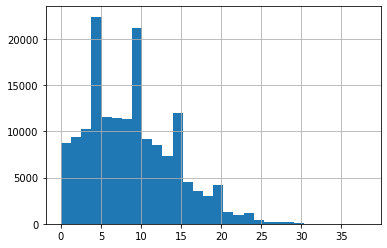

In [21]:
data_calls['duration'].hist(bins=30) # строю гист. всех звонков

По гистограмме видно, что больше всего звонков около 5 и 9 мин

In [22]:
data_calls['month']=data_calls['call_date'].dt.month

In [23]:
group_calls=data_calls.pivot_table(index=['month','user_id'],values='duration',aggfunc=('sum'))

Делаю сводную по месяцам и звонкам

In [24]:
group_calls

duration
month user_id          
1     1005         95.0
      1032        379.0
      1045          9.0
      1055        548.0
      1071        193.0
...                 ...
12    1494        413.0
      1495       1025.0
      1496        516.0
      1497        545.0
      1499        490.0

[3168 rows x 1 columns]

In [25]:
data_messages['month']=data_messages['message_date'].dt.month # добавляю столбец месяц

In [26]:
group_messages=data_messages.pivot_table(index=['month','user_id'],values='message_date',aggfunc=('count'))

Делаю сводную по месяцам и сообщениям

In [27]:
group_messages

message_date
month user_id              
1     1005                7
      1032               38
      1045                5
      1055               30
      1071               16
...                     ...
12    1493               78
      1495               84
      1496               51
      1497               17
      1499               66

[2717 rows x 1 columns]

In [28]:
group_messages_call=group_messages.merge(group_calls,on=['user_id','month'],how='outer') # объединяю таблицу звонки и сообщения 

In [29]:
group_messages_call

,,message_date,duration
user_id,month,,
1005,1,7.0,95.0
1032,1,38.0,379.0
1045,1,5.0,9.0
1055,1,30.0,548.0
1071,1,16.0,193.0
...,...,...,...
1462,12,NaN,876.0
1466,12,NaN,657.0
1469,12,NaN,635.0


In [30]:
data_internet['month']=data_internet['session_date'].dt.month # добавляю столбец месяц

In [31]:
group_internet=data_internet.pivot_table(index=['month','user_id'],values='mb_used',aggfunc=('sum'))

Делаю срез по месяцам и интернета

In [32]:
group_internet

mb_used
month user_id         
1     1005      2724.0
      1032     24100.0
      1045      2343.0
      1055     17069.0
      1071     15585.0
...                ...
12    1494     17601.0
      1495     23404.0
      1496     20702.0
      1497     19899.0
      1499     13037.0

[3203 rows x 1 columns]

In [33]:
group_all=group_messages_call.merge(group_internet,on=['user_id','month'],how='outer')

объединяю таблицу звонки-сообщения и интернет

In [34]:
data_users['month']=data_users['reg_date'].dt.month

In [35]:
group_all=group_all.merge(data_users,on=['user_id','month'],how='inner')

объединяю таблицу звонки-сообщения-интернет и информация о пользователях

In [36]:
group_all=group_all.fillna(0).sort_values(by='user_id')#  меняю nan на 0

---
## Комментарий от наставника

Лучше не хранить в таблице информацию, которая не поможет нам в дальнейшем анализе: имя, фамилия клиента и пр.

---

In [37]:
del group_all['age']
del group_all['churn_date']

In [38]:
del group_all['first_name']
del group_all['last_name']
del group_all['reg_date']

Удаляю все не нужные столбцы. 

### Вопрос, не нашел как удалить одной строкой несколько столбцов?

In [39]:
group_all.head() # Рабочая таблица

,user_id,month,message_date,duration,mb_used,city,tariff
132,1000,5,22.0,158.0,2252.0,Краснодар,ultra
483,1001,11,0.0,429.0,18405.0,Москва,smart
167,1002,6,4.0,117.0,10844.0,Стерлитамак,smart
239,1003,8,37.0,377.0,8557.0,Москва,ultra
133,1004,5,95.0,34.0,13392.0,Новокузнецк,ultra


In [40]:
#Функция посчета выручки в зависимости от тарифа

def how_money(row):
    
    messages=row['message_date']
    calls=row['duration']
    internet=row['mb_used']
    tariff=row['tariff']
    
    
    if (tariff=='smart'):
        i=0
    else:
        i=1
        
    ostatok_call=data_tariffs['minutes_included'][i]-calls
    if ostatok_call<0:
        call_money=-ostatok_call*data_tariffs['rub_per_minute'][i]
    else:
        call_money=0
         
    ostatok_internet=data_tariffs['mg_per_month_included'][i]-internet
    if ostatok_internet<0:
        internet_money=round((-ostatok_internet/1024))*data_tariffs['rub_per_gb'][i]
    else:
        internet_money=0
            
    ostatok_messages=data_tariffs['messages_included'][i]-messages
    if ostatok_messages<0:
        messages_money=-ostatok_messages*data_tariffs['rub_per_message'][i]
    else:
        messages_money=0
            
    money=call_money+internet_money+messages_money+data_tariffs['rub_monthly_fee'][i]
    return money     

In [41]:
group_all['money']=group_all.apply(how_money,axis=1) # скармливаю функцию Apply

In [42]:
group_all.head()

,user_id,month,message_date,duration,mb_used,city,tariff,money
132,1000,5,22.0,158.0,2252.0,Краснодар,ultra,1950.0
483,1001,11,0.0,429.0,18405.0,Москва,smart,1150.0
167,1002,6,4.0,117.0,10844.0,Стерлитамак,smart,550.0
239,1003,8,37.0,377.0,8557.0,Москва,ultra,1950.0
133,1004,5,95.0,34.0,13392.0,Новокузнецк,ultra,1950.0


---
## Комментарий от наставника

Стоит округлять значения интернет трафика после деления на 1024 для получения целых чисел выручки. В остальном все верно, финальная таблица получена.

---

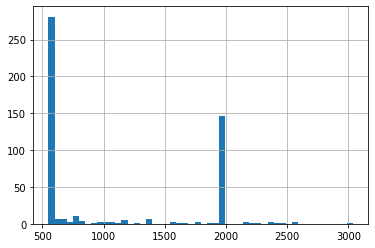

In [43]:
group_all['money'].hist(bins=50)

In [44]:
group_all.groupby('tariff')['money'].sum()

tariff
smart    238487.0
ultra    289950.0
Name: money, dtype: float64

In [45]:
group_all.query('tariff=="ultra" and money>1950')

,user_id,month,message_date,duration,mb_used,city,tariff,money
332,1276,10,29.0,369.0,33501.0,Москва,ultra,2400.0
371,1304,11,65.0,435.0,34860.0,Владимир,ultra,2550.0
52,1330,2,56.0,511.0,32501.0,Нижний Новгород,ultra,2250.0


In [46]:
group_all.query('tariff=="smart" and money>550').count()

user_id         81
month           81
message_date    81
duration        81
mb_used         81
city            81
tariff          81
money           81
dtype: int64

Общая гистограмма прибыли для друх тарифов. Видно,что тариф смарт прибыльнее. В основном люди за месяц находятся в рамка тарифа и не переплачивают.

---
## Комментарий от наставника

Чем же смарт прибыльнее? Разве лучше для компании, когда 300 человек платят 500 рублей в месяц или 150 человек, но по 2000 рублей в месяц? Переплачивают, у нас довольно тяжелый правый хвост у распределений. 

---

Из графика и сгруппированной таблица по тарифам видно, что самый прибыльный тариф это Ультра. За рамки ежемесячного платежа больше всего у пользователей Смарт.

In [47]:
count_durations=group_all.pivot_table(index='month',values='duration',aggfunc=('count'))

Подсчет количества звонков

In [48]:
tariff_ultra=(group_all
     .query('tariff=="ultra"')
     .pivot_table(index='month',values=('duration','message_date','mb_used'),aggfunc=('sum'))
     #.plot(y='mb_used',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra')
)

tariff_smart=(group_all
     .query('tariff=="smart"')
     .pivot_table(index='month',values=('duration','message_date','mb_used'),aggfunc=('sum'))
                                                                                      
)


отделяю тариф Ультра и тариф Смарт по отдельности и делаю срез по месяцам с подсчетом сумм по звокам, интернету и сообщениям

In [49]:
tariff_ultra

,duration,mb_used,message_date
month,,,
1,3830.0,118146.0,304.0
2,1861.0,117164.0,181.0
3,4168.0,96257.0,146.0
4,5254.0,212908.0,412.0
5,2170.0,106492.0,332.0
6,3688.0,187015.0,501.0
7,2993.0,71482.0,261.0
8,3886.0,116998.0,583.0
9,2686.0,71710.0,238.0


In [50]:
tariff_smart

,duration,mb_used,message_date
month,,,
1,6901.0,289114.0,620.0
2,4019.0,162801.0,312.0
3,5016.0,187955.0,400.0
4,8046.0,275685.0,739.0
5,5631.0,274927.0,514.0
6,4249.0,188750.0,314.0
7,8879.0,325371.0,671.0
8,7208.0,328529.0,577.0
9,6780.0,241412.0,549.0


Сделал срез по месяцам и посчитал сумму потраченных минут, сообщенийб интернета для каждого тарифа

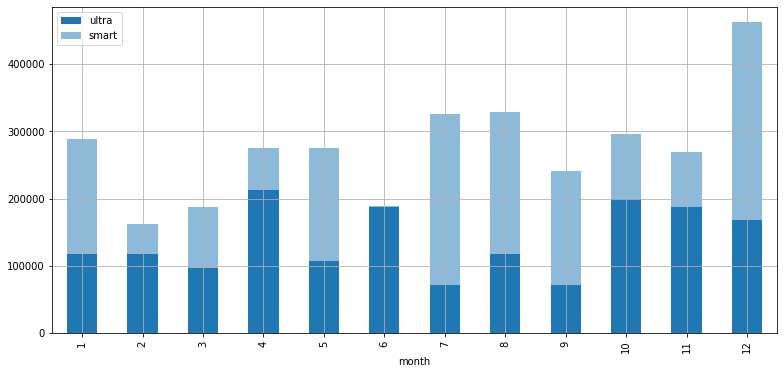

In [51]:
ax=tariff_ultra.plot(y='mb_used',figsize=(13,6),style='o-',kind='bar',label='ultra')
#plt.show()
tariff_smart.plot(y='mb_used',grid=True,figsize=(13,6),style='o-',kind='bar',label='smart',alpha=0.5,ax=ax)



График количества потраценного интернета по месяцам по двум тарифам. Видно, что Смарт лидируем. В декабре пик.

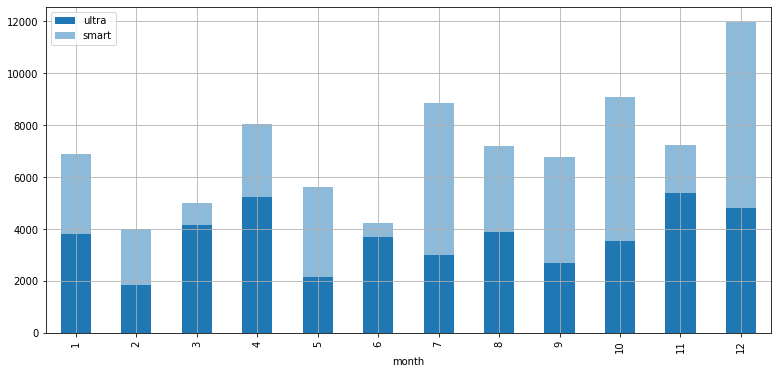

In [52]:
ax=tariff_ultra.plot(y='duration',figsize=(13,6),style='o-',kind='bar',label='ultra')
#plt.show()
tariff_smart.plot(y='duration',grid=True,figsize=(13,6),style='o-',kind='bar',label='smart',alpha=0.5,ax=ax)

График количества минут разговора по месяцам и двум тарифам. Смарт также лидирует.

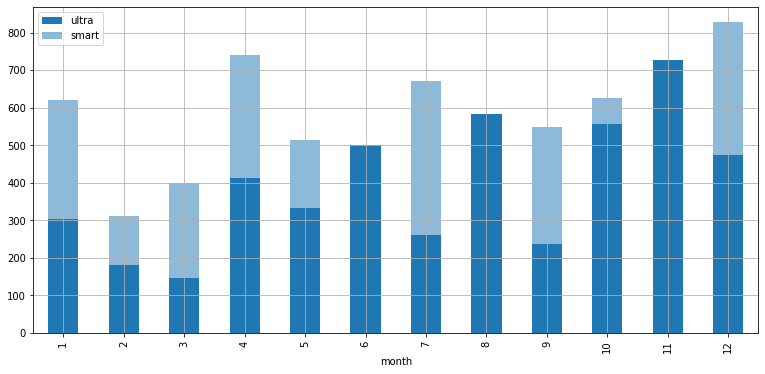

In [53]:
ax=tariff_ultra.plot(y='message_date',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra')

tariff_smart.plot(y='message_date',grid=True,figsize=(13,6),style='o-',kind='bar',label='smart',alpha=0.5,ax=ax)
plt.show()

График количества сообщений по месяцам. Тут ситуация такая же, по тариф Ультра немного поднялся по количеству сообщений

## Срез по месяцам для Ультра и расчета средних значений по звонка, сообщениям, интернету

In [54]:
mean_ultra=(group_all
     .query('tariff=="ultra"')
     .pivot_table(index='month',values=('duration','message_date','mb_used'),aggfunc=('mean'))    
)

## Среднее значение mean_duration	mean_mb_used	mean_message для тарифа Ультра. 

In [55]:
mean_ultra.set_axis(['mean_duration','mean_mb_used','mean_message'],axis='columns',inplace=True)
mean_ultra

,mean_duration,mean_mb_used,mean_message
month,,,
1,425.555556,13127.333333,33.777778
2,124.066667,7810.933333,12.066667
3,320.615385,7404.384615,11.230769
4,291.888889,11828.222222,22.888889
5,180.833333,8874.333333,27.666667
6,216.941176,11000.882353,29.470588
7,427.571429,10211.714286,37.285714
8,242.875000,7312.375000,36.437500
9,298.444444,7967.777778,26.444444


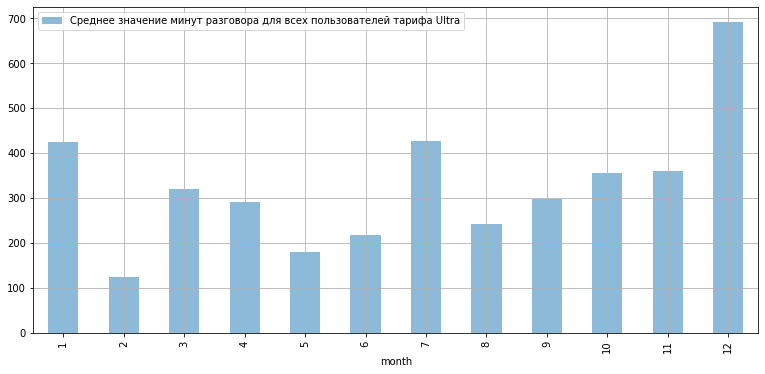

In [56]:
mean_ultra.plot(y='mean_duration',grid=True,figsize=(13,6),style='o-',kind='bar',label='Среднее значение минут разговора для всех пользователей тарифа Ultra',alpha=0.5)

In [57]:
mean_ultra['mean_minute_for_person']=tariff_ultra['duration']/len(group_all.query('tariff=="ultra"'))

Считаю среднее время разговора пользователей за каждый месяц пользователей ультра

---
## Комментарий от наставника

Импорт необходимых библиотек лучше делать в самом начале работы в одной ячейке.

---

# Считаю дисперсию и отклонение для тарифа Ultra по месяцам

In [58]:
ultra_person_calls=group_all.query('tariff=="ultra"')# записываю в переменную всех пользователей Ультра для подсчета дисперсии 
ultra_person_calls.head()

,user_id,month,message_date,duration,mb_used,city,tariff,money
132,1000,5,22.0,158.0,2252.0,Краснодар,ultra,1950.0
239,1003,8,37.0,377.0,8557.0,Москва,ultra,1950.0
133,1004,5,95.0,34.0,13392.0,Новокузнецк,ultra,1950.0
350,1013,11,17.0,366.0,9773.0,Иваново,ultra,1950.0
351,1016,11,39.0,27.0,7375.0,Омск,ultra,1950.0


### Считаю дисперсию по всем показателям Ultra

In [59]:
disp_sigma_ultra=ultra_person_calls.pivot_table(index='month',values='duration',aggfunc=(np.var))
#Считаю дисперсию звонков

In [60]:
disp_sigma_ultra_messages=ultra_person_calls.pivot_table(index='month',values='message_date',aggfunc=(np.var))
#Считаю дисперсию сообщений

In [61]:
disp_sigma_ultra_internet=ultra_person_calls.pivot_table(index='month',values='mb_used',aggfunc=(np.var))
#Считаю дисперсию интернет

### Считаю стандартное отклонение по всем показателям Ultra

In [62]:
disp_sigma_ultra['sigma']=disp_sigma_ultra['duration'].apply(np.sqrt)
#Считаю стандартное отклонение по звонкам

In [63]:
disp_sigma_ultra_messages['sigma']=disp_sigma_ultra_messages['message_date'].apply(np.sqrt)
#Считаю стандартное отклонение по cообщениям

In [64]:
disp_sigma_ultra_internet['sigma']=disp_sigma_ultra_internet['mb_used'].apply(np.sqrt)
#Считаю стандартное отклонение по интернету

In [65]:
disp_sigma_ultra.set_axis(['dispersion_call','sigma_call'],axis='columns',inplace=True)
disp_sigma_ultra_messages.set_axis(['dispersion_message','sigma_message'],axis='columns',inplace=True)
disp_sigma_ultra_internet.set_axis(['dispersion_internet','sigma_internet'],axis='columns',inplace=True)
# Переименовываю столбцы

In [66]:
disp_sigma_ultra=disp_sigma_ultra.merge(disp_sigma_ultra_messages,on='month')

In [67]:
disp_sigma_ultra=disp_sigma_ultra.merge(disp_sigma_ultra_internet,on='month')

In [68]:
mean_ultra=mean_ultra.merge(disp_sigma_ultra,on='month')

## Полная Таблица дисперсии и сигма (среднеквадратичное отклонение),средних для Ультра по месяцам

In [69]:
mean_ultra['mean_money']=group_all.query('tariff=="ultra"').pivot_table(index='month',values='money',aggfunc=('mean')) # Считаю среднее по прибыли

In [70]:
mean_ultra['dispersion_money']=group_all.query('tariff=="ultra"').pivot_table(index='month',values='money',aggfunc=(np.var)) # Считаю дисперсию по прибыли

In [71]:
mean_ultra['sigma_money']=np.sqrt(mean_ultra['dispersion_money']) # Считаю сигму по прибыли

In [72]:
mean_ultra.head(12)

,mean_duration,mean_mb_used,mean_message,mean_minute_for_person,dispersion_call,sigma_call,dispersion_message,sigma_message,dispersion_internet,sigma_internet,mean_money,dispersion_money,sigma_money
month,,,,,,,,,,,,,
1,425.555556,13127.333333,33.777778,25.878378,72139.527778,268.588026,940.694444,30.670742,4.703700e+07,6858.352809,1950.0,0.0,0.000000
2,124.066667,7810.933333,12.066667,12.574324,18903.352381,137.489463,331.352381,18.203087,8.761124e+07,9360.087625,1970.0,6000.0,77.459667
3,320.615385,7404.384615,11.230769,28.162162,48900.589744,221.134777,107.858974,10.385518,3.259826e+07,5709.488397,1950.0,0.0,0.000000
4,291.888889,11828.222222,22.888889,35.500000,68159.163399,261.073100,1014.104575,31.845009,8.469395e+07,9202.931391,1950.0,0.0,0.000000
5,180.833333,8874.333333,27.666667,14.662162,40516.515152,201.287146,632.242424,25.144431,6.571183e+07,8106.283235,1950.0,0.0,0.000000
6,216.941176,11000.882353,29.470588,24.918919,35233.808824,187.706710,727.389706,26.970163,4.167793e+07,6455.844541,1950.0,0.0,0.000000
7,427.571429,10211.714286,37.285714,20.222973,96651.952381,310.888971,732.571429,27.066057,4.999735e+07,7070.880301,1950.0,0.0,0.000000
8,242.875000,7312.375000,36.437500,26.256757,55488.650000,235.560290,1126.129167,33.557848,1.979359e+07,4448.999122,1950.0,0.0,0.000000
9,298.444444,7967.777778,26.444444,18.148649,129051.277778,359.237077,761.777778,27.600322,4.716078e+07,6867.370708,1950.0,0.0,0.000000


In [73]:
mean_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 13 columns):
mean_duration             12 non-null float64
mean_mb_used              12 non-null float64
mean_message              12 non-null float64
mean_minute_for_person    12 non-null float64
dispersion_call           12 non-null float64
sigma_call                12 non-null float64
dispersion_message        12 non-null float64
sigma_message             12 non-null float64
dispersion_internet       12 non-null float64
sigma_internet            12 non-null float64
mean_money                12 non-null float64
dispersion_money          12 non-null float64
sigma_money               12 non-null float64
dtypes: float64(13)
memory usage: 1.3 KB


---
## Комментарий от наставника

Стоит добавить и столбцы по прибыли: среднее, дисперсию.

---

Посчитал и внес в таблицу выше

## Ниже срез по месяцам для Смарт и расчета средних значений по звонка, сообщениям, интернету

In [74]:
mean_smart=(group_all
     .query('tariff=="smart"')
     .pivot_table(index='month',values=('duration','message_date','mb_used'),aggfunc=('mean'))    
)

## Среднее значение mean_duration mean_mb_used mean_message для тарифа Smart. 

In [75]:
mean_smart.set_axis(['mean_duration','mean_mb_used','mean_message'],axis='columns',inplace=True)
mean_smart

,mean_duration,mean_mb_used,mean_message
month,,,
1,202.970588,8503.352941,18.235294
2,167.458333,6783.375000,13.000000
3,264.000000,9892.368421,21.052632
4,229.885714,7876.714286,21.114286
5,194.172414,9480.241379,17.724138
6,184.739130,8206.521739,13.652174
7,239.972973,8793.810811,18.135135
8,212.000000,9662.617647,16.970588
9,260.769231,9285.076923,21.115385


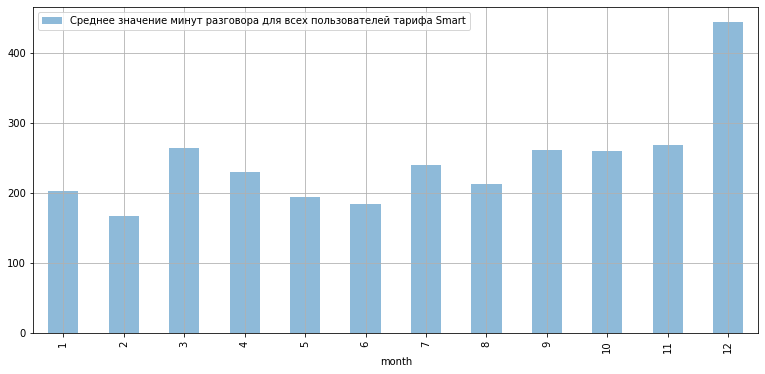

In [76]:
mean_smart.plot(y='mean_duration',grid=True,figsize=(13,6),style='o-',kind='bar',label='Среднее значение минут разговора для всех пользователей тарифа Smart',alpha=0.5)

Среднее время разговора для каждого месяца Смарт

In [77]:
mean_smart['mean_minute_for_person']=tariff_smart['duration']/len(group_all.query('tariff=="smart"'))

In [78]:
smart_person_calls=group_all.query('tariff=="smart"')# записываю в переменную всех пользователей Smart для подсчета дисперсии 
smart_person_calls.head()

,user_id,month,message_date,duration,mb_used,city,tariff,money
483,1001,11,0.0,429.0,18405.0,Москва,smart,1150.0
167,1002,6,4.0,117.0,10844.0,Стерлитамак,smart,550.0
0,1005,1,7.0,95.0,2724.0,Набережные Челны,smart,550.0
418,1006,2,0.0,42.0,1391.0,Ульяновск,smart,550.0
91,1007,4,11.0,196.0,8013.0,Москва,smart,550.0


# Считаю дисперсию и отклонение для тарифа Smart по месяцам

In [79]:
smart_person_calls=group_all.query('tariff=="smart"')# записываю в переменную всех пользователей smart для подсчета дисперсии 
smart_person_calls.head()

,user_id,month,message_date,duration,mb_used,city,tariff,money
483,1001,11,0.0,429.0,18405.0,Москва,smart,1150.0
167,1002,6,4.0,117.0,10844.0,Стерлитамак,smart,550.0
0,1005,1,7.0,95.0,2724.0,Набережные Челны,smart,550.0
418,1006,2,0.0,42.0,1391.0,Ульяновск,smart,550.0
91,1007,4,11.0,196.0,8013.0,Москва,smart,550.0


### Считаю дисперсию по всем показателям Smart

In [80]:
disp_sigma_smart=smart_person_calls.pivot_table(index='month',values='duration',aggfunc=(np.var))
#Считаю дисперсию звонков

In [81]:
disp_sigma_smart_messages=smart_person_calls.pivot_table(index='month',values='message_date',aggfunc=(np.var))
#Считаю дисперсию сообщений

In [82]:
disp_sigma_smart_internet=smart_person_calls.pivot_table(index='month',values='mb_used',aggfunc=(np.var))
#Считаю дисперсию интернет

### Считаю стандартное отклонение по всем показателям Smart

In [83]:
disp_sigma_smart['sigma']=disp_sigma_smart['duration'].apply(np.sqrt)
#Считаю стандартное отклонение по звонкам

In [84]:
disp_sigma_smart_messages['sigma']=disp_sigma_smart_messages['message_date'].apply(np.sqrt)
#Считаю стандартное отклонение по cообщениям

In [85]:
disp_sigma_smart_internet['sigma']=disp_sigma_smart_internet['mb_used'].apply(np.sqrt)
#Считаю стандартное отклонение по интернетуsmart

In [86]:
disp_sigma_smart.set_axis(['dispersion_call','sigma_call'],axis='columns',inplace=True)
disp_sigma_smart_messages.set_axis(['dispersion_message','sigma_message'],axis='columns',inplace=True)
disp_sigma_smart_internet.set_axis(['dispersion_internet','sigma_internet'],axis='columns',inplace=True)
# Переименовываю столбцы

In [87]:
disp_sigma_smart=disp_sigma_smart.merge(disp_sigma_smart_messages,on='month')

In [88]:
disp_sigma_smart=disp_sigma_smart.merge(disp_sigma_smart_internet,on='month')

In [89]:
mean_smart['mean_money']=group_all.query('tariff=="smart"').pivot_table(index='month',values='money',aggfunc=('mean')) # Считаю среднее по прибыли

In [90]:
mean_smart['dispersion_money']=group_all.query('tariff=="smart"').pivot_table(index='month',values='money',aggfunc=(np.var)) # Считаю среднее по прибыли

In [91]:
mean_smart['sigma_money']=np.sqrt(mean_smart['dispersion_money'])

In [92]:
mean_smart=mean_smart.merge(disp_sigma_smart,on='month')

# Полная Таблица дисперсии и сигма (среднеквадратичное отклонение),средних для Smart по месяцам

In [93]:
mean_smart.head()

,mean_duration,mean_mb_used,mean_message,mean_minute_for_person,mean_money,dispersion_money,sigma_money,dispersion_call,sigma_call,dispersion_message,sigma_message,dispersion_internet,sigma_internet
month,,,,,,,,,,,,,
1,202.970588,8503.352941,18.235294,19.717143,703.411765,192149.219251,438.348285,23683.605169,153.894786,262.367201,16.197753,4.143752e+07,6437.197903
2,167.458333,6783.375000,13.000000,11.482857,556.000000,695.739130,26.376867,18261.041667,135.133422,268.347826,16.381326,2.067254e+07,4546.706365
3,264.000000,9892.368421,21.052632,14.331429,689.421053,159156.479532,398.944206,23345.111111,152.791070,362.052632,19.027681,2.700547e+07,5196.679017
4,229.885714,7876.714286,21.114286,22.988571,572.485714,11200.727731,105.833491,20855.927731,144.415815,425.398319,20.625187,1.784717e+07,4224.590900
5,194.172414,9480.241379,17.724138,16.088571,738.206897,253891.312808,503.876287,21599.933498,146.969158,338.492611,18.398169,4.838563e+07,6955.978301


In [94]:
mean_smart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 13 columns):
mean_duration             12 non-null float64
mean_mb_used              12 non-null float64
mean_message              12 non-null float64
mean_minute_for_person    12 non-null float64
mean_money                12 non-null float64
dispersion_money          12 non-null float64
sigma_money               12 non-null float64
dispersion_call           12 non-null float64
sigma_call                12 non-null float64
dispersion_message        12 non-null float64
sigma_message             12 non-null float64
dispersion_internet       12 non-null float64
sigma_internet            12 non-null float64
dtypes: float64(13)
memory usage: 1.3 KB


## Возвращаюсь к дата фрэйм ultra_person_calls и smart_person_calls, в котором все пользователи Ультра и Смарт построим гистограммы.

In [95]:
#ax=ultra_person_calls.hist(column='duration',density=True, bins=30)
#smart_person_calls.hist(column='duration',density=True, bins=30,alpha=0.5,ax=ax)

### Гистограмма распределия длительности звонков пользователей Ультра

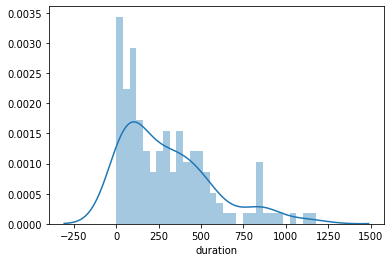

In [96]:
sns.distplot(ultra_person_calls['duration'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Ультра разговаривают около 1 мин 

### Гистограмма распределия длительности звонков пользователей Смарт

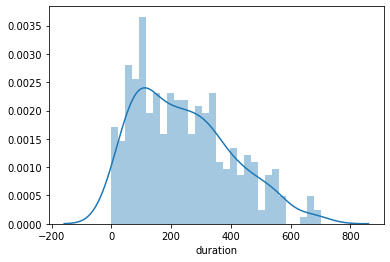

In [97]:
sns.distplot(smart_person_calls['duration'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Смарт разговаривают около 100 мин 

### Гистограмма распределия количества отправленных смс пользователей Ультра

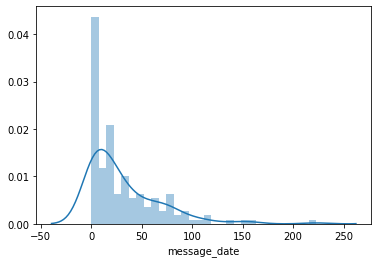

In [98]:
sns.distplot(ultra_person_calls['message_date'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Ультра отправляют около 10 смс

### Гистограмма распределия количества отправленных смс пользователей Смарт

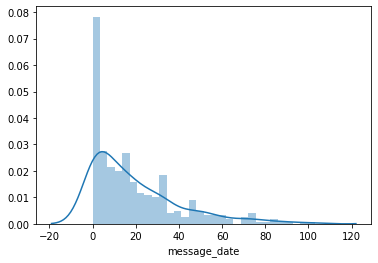

In [99]:
sns.distplot(smart_person_calls['message_date'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Смарт отправляют около 0-5 смс

### Гистограмма распределия количества потраченного интернета пользователей Ультра

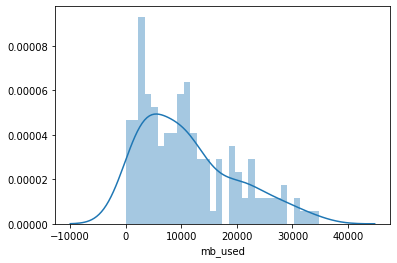

In [100]:
sns.distplot(ultra_person_calls['mb_used'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Ультра используют около 2000 гб

### Гистограмма распределия количества потраченного интернета пользователей Смарт

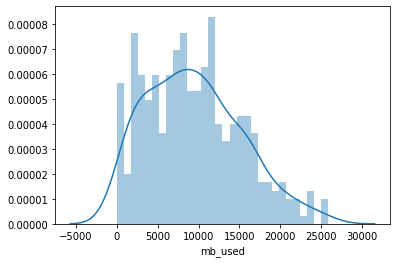

In [101]:
sns.distplot(smart_person_calls['mb_used'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Смарт используют около 10000 гб

In [103]:
#ax=ultra_person_calls.hist(column='message_date',density=True, bins=30)
#smart_person_calls.hist(column='message_date',density=True, bins=30,ax=ax,alpha=0.5)

### Общая гистограмма распределения по потраченному интернету и сообщениям для тарифа Ультра

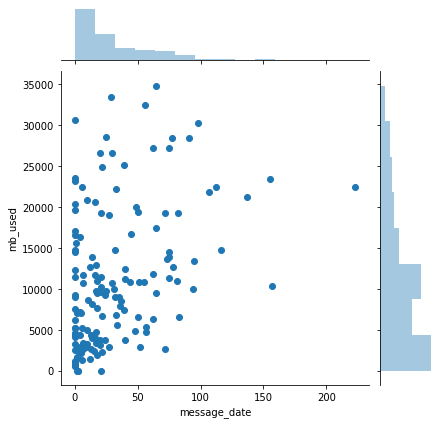

In [104]:
sns.jointplot(x='message_date', y='mb_used', data=ultra_person_calls, kind='scatter');

In [105]:
#ax=ultra_person_calls.hist(column='mb_used',density=True, bins=30)
#smart_person_calls.hist(column='mb_used',density=True, bins=30,ax=ax,alpha=0.5)

---
## Комментарий от наставника

Нет выводов из графиков, а они нужны. На самих графиках непонятно, где какой тариф. Стоит подписывать как оси, так и то, что на графике изображено.

---

<font color=blue> Здорово, что использован seaborn, и изучены некоторые особенные его графики. Хорошая визуализация.
    
---

## Проверка гипотезы

Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

Для проверки гипотез принимаем Нулевую гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (равны).
Проверка гипотезы альтернативной: среднее значение выручки Ультра меньше предполагаемого(значение Смарт)

In [106]:
alpha=0.05 # критический уровень статистической значимости

In [107]:
ultra_all=group_all.query('tariff=="ultra"')

In [108]:
smart_all=group_all.query('tariff=="smart"')

In [109]:
ultra_all['money'].mean() # Среднее значение выречки пользователей Ультра

1959.1216216216217

In [110]:
disp_ultra=np.var(ultra_all['money'])

In [112]:
print('99% значений попадают с интервал:+-',round(3*np.sqrt(disp_ultra)),'от среднего значения',round(ultra_all['money'].mean())) 

99% значений попадают с интервал:+- 197.0 от среднего значения 1959.0


Считаю доверительный 95% интервал для Ультра

In [120]:
st.t.interval(0.95, len(ultra_all['money'])-1, loc=np.mean(ultra_all['money']), scale=st.sem(ultra_all['money']))

(1948.4014506466056, 1969.8417925966378)

In [121]:
smart_all['money'].mean() # Среднее значение выручки пользователей Смарт

681.3914285714286

In [122]:
disp_smart=np.var(smart_all['money'])

In [123]:
print('99% значений попадают с интервал:+-',round(3*np.sqrt(disp_smart)),'от среднего значения',round(smart_all['money'].mean())) 

99% значений попадают с интервал:+- 1108.0 от среднего значения 681.0


### Не понимаю почему такая большая 3 сигма?

Считаю доверительный 95% интервал для Смарт

In [124]:
st.t.interval(0.95, len(smart_all['money'])-1, loc=np.mean(smart_all['money']), scale=st.sem(smart_all['money']))

(642.4929956340956, 720.2898615087616)

<font color=blue> Уже на основании доверительных интервалов можно сказать, что различия есть.
    
---

---
## Комментарий от наставника

Приводить выборочные средние значения лучше с доверительными интервалами. Альтернативную гипотезу тоже стоит писать.



Посчитал доверительный интервал и 3 сигма выше

In [125]:
smart_all['money'].var() #Дисперсия выручки Смарт

136904.800499386

In [126]:
ultra_all['money'].var() #Дисперсия выручки Смарт

4355.005515719801

Значения дисперсии сильно отличаются. Поэтому в функции st.ttest_ind буду использовать параметр equal_var=False

In [127]:
result=st.ttest_ind(smart_all['money'],ultra_all['money'],equal_var=False) 

Проверяем гипотезу о равенстве двух средних генеральных совокупностей

In [128]:
result.pvalue #выведите p-value из результата)

2.015340505768868e-207

In [129]:
if (result.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Для проверки гипотез принимаем Нулевую гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (равны)

Нулевая гипотеза отвергнута. Значения средней выручки тарифа Ультра и тарифа Смарт различаются.
Проверка гипотезы альтернативной: среднее значение выручки Ультра меньше предполагаемого(значение Смарт)

In [131]:
interested_value=smart_all['money'].mean() # среднее значение smart. относительно которого проверяем

In [132]:
result=st.ttest_1samp(ultra_all['money'],interested_value) 

In [133]:
result.pvalue/2 #p-value

1.0847243109505274e-191

In [134]:
if (result.pvalue/2<alpha) and (ultra_all['money'].mean()<=interested_value):
     print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

Не получилость отвергнуть нулевую гипотезу


При проверке односторонней гипотезы "среднее значение выручки Ультра меньше предполагаемого(значение Смарт)", отвергли, если выполнелось два условия:
- среднее значение выручки Ультра <= предполагаемого(значение Смарт)
- разница среднего значения и статистической значимости деленой пополам была существенной

Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Нулевая гипотеза звучит так: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

In [135]:
moscow_all=group_all.query('city=="Москва"')

In [136]:
other_all=group_all.query('city!="Москва"')

In [137]:
alpha=0.05

In [138]:
moscow_all['money'].var()

440383.3879612451

In [139]:
moscow_all['money'].mean()

1083.4141414141413

In [140]:
other_all['money'].var()

439741.2431329581

In [141]:
other_all['money'].mean()

1055.5864661654136

In [142]:
result=st.ttest_ind(moscow_all['money'],other_all['money'])

In [143]:
result.pvalue

0.7087987465859309

In [144]:
if (result.pvalue<alpha):
    print('Отвергаем гипотизу')
else:
    print('Гипотизу отвергнуть не удалось')

Гипотизу отвергнуть не удалось


Гипотезу отвергаем. Средняя выручка в Москве отличается от средней выручки в регионах.

Общий вывод: самый популярный тариф оказался Сматр. Он приносит больше всего денег. Пользователи обычно не выходят за рамки выбранного тарифа. Средняя выручка по тарифу Смарт 1958 руб, а по тарифу Ультра 683 руб. Сравния средние генеральных выборок тарифа Ультра и тарифа Смарт можно сказать, что они отличаются. В Москве средняя прибыль 1085. Для дальнейшей корректировки рекламного бюджета я бы в Москве и других больших города продвигал тариф Ультра, в других регионах больше бы двигал тариф Смарт.

---
## Комментарий от наставника

Вывод неверный. Смарт приносит меньше выручки для компании. Если бы пользователи не выходили бы за лимиты, то выручка в среднем от Смарт была бы 550 рублей - стоимость ежемесячной платы, но она у нас 683 рубля - на четверь больше. Сравнивать точечные оценки выборки - не самый хороший способ, нужны доверительные интервалы. По дальнейшему продвижению тарифов стоит расписать свое мнение подробнее, почему стоит делать именно так.

---

Общий вывод:
самый популярный тариф оказался Смарт. Но самый прибылный тариф- Ультра. Доверительный интервал для тарифа ультра прибыли сосатвляет 1948-1969 руб, а доверительный интервал для тарифа Смарт 642-720 руб. 

<font color=blue> Работа стала лучше, теперь сделана хорошо. Все помарки исправлены, молодец. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

- В начале работы стоит делать вступление;
- Делай больше комментариев по работе. Гипотезы, наблюдения, выводы - это большая часть работы аналитика;
- Если еще не встречался с библиотекой seaborn, то изучи ее. Можно строить презентабельные графики с ее помощью;
- Улучши работу с графиками;
- Изучи, как можно построить доверительный интревал для выборочного среднего.

Ты проделал большую работу, молодец! Исправь выводы и получится довольно хорошая работа :)

-----